# Динамика частотности как критерий разграничения словоизменения и словообразования (применительно к видовой парности русского глагола)

В ноутбуке приведены материалы к статье:

[«Динамика частотности как критерий разграничения словоизменения и словообразования (применительно к видовой парности русского глагола)» // Компьютерная лингвистика и интеллектуальные технологии: По материалам ежегодной международной конференции «Диалог». Вып. 22. Москва: РГГУ. С. 142-160.](https://www.dialog-21.ru/media/5897/gorbovaevpluschuikovaoiu018.pdf)

Исследование выполнено в соавторстве с [Е. В. Горбовой](https://independent.academia.edu/ElenaGorbova)


**Описание данных**

**Материалом исследования** послужити данные о изменении по годам частотности словоформ, выявленном путем обращения к корпусу Google Books Ngram (GBN) с визуализацией посредством сервиса [Ngram Viewer](https://books.google.com/ngrams/).

**Задача исследования**
критическоt осмысления количественного подхода к проведению границы между словоизменением и словообразованием через анализ динамики частотности употребления словоформ, возможность которого обеспечивается объемными корпусными данными и средствами их визуализации



## Загрузка данных

Импортируем необходимые библиотеки и модули.

In [1]:
import pandas as pd
import scipy.stats as stats
import requests
import urllib
import matplotlib.pyplot as plt

Напишем функцию, которая извлечет частоты по годам для определенной словоформы. В качестве аргументов приводим параметры запроса: словоформа, корпус, годы, сглаживание). Зададим временной промежуток, за которых хотим получить данные о частотности, с 1830 по 2019 год.

In [4]:
def run_query(query, start_year=1830, end_year=2019, 
             corpus='ru-2019', smoothing=3):
    query = urllib.parse.quote(query)
    url = (
        'https://books.google.com/ngrams/json?content=' + 
        query + '&year_start=' + str(start_year) + '&year_end=' +
        str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + 
        str(smoothing) + ''
    )
    
    response = requests.get(url)
    output = response.json()
    return_data = []
    if len(output) == 0:
        return "Нет данных для Ngram."
    else:
        for i in range(len(output)):
            return_data.append(output[i]['timeseries'])
    return return_data[0]

Создадим датафрейм, в котором будут приведены частоты интересующих нас словоформ по годам.
Анализу подлежат глаголы, входящие в следующие тройки:
* *свариться — вариться / свариваться*
* *сварить — варить / сваривать*
* *съесть — есть / съедать* (в форме прошедшего времени для исключения омонимии с формой глагола *быть*)
* *оторвать — рвать / отрывать*
* *пробить — бить / пробивать*
* *сгореть — гореть / сгорать*
* *сорвать — рвать / срывать*
* *разбить — бить / разбивать* 
* *разорвать — рвать / разрывать* 
* *намазать — мазать / намазывать* 
* *налить — лить / наливать*

In [23]:
df = pd.DataFrame(
    {
        'год':list(range(1830,2020)), 
        'вариться':run_query('вариться'), 
        'свариться':run_query('свариться'), 
        'свариваться':run_query('свариваться'),
        'варить':run_query('варить'), 
        'сварить':run_query('сварить'), 
        'сваривать':run_query('сваривать'),
        'ел':run_query('ел'), 
        'съел':run_query('съел'), 
        'съедал':run_query('съедал'),
        'рвать':run_query('рвать'), 
        'оторвать':run_query('оторвать'), 
        'отрывать':run_query('отрывать'),
        'бить':run_query('бить'), 
        'пробить':run_query('пробить'), 
        'пробивать':run_query('пробивать'),
        'гореть':run_query('гореть'), 
        'сгореть':run_query('сгореть'), 
        'сгорать':run_query('сгорать'),
        'сорвать':run_query('сорвать'), 
        'срывать':run_query('срывать'),
        'разорвать':run_query('разорвать'),  
        'разрывать':run_query('разрывать'),
        'разбить':run_query('разбить'), 
        'разбивать':run_query('разбивать'),
        'мазать':run_query('мазать'),
        'намазать':run_query('намазать'), 
        'намазывать':run_query('намазывать'),
        'лить':run_query('лить'),
        'налить':run_query('налить'), 
        'наливать':run_query('наливать')
    }
)

Переводим значения для всех столбцов в проценты.

In [24]:
df[
    ['вариться', 'свариться', 'свариваться', 
    'варить', 'сварить', 'сваривать', 
    'ел', 'съел', 'съедал', 
    'рвать', 'оторвать', 'отрывать', 
    'бить', 'пробить', 'пробивать',  
    'гореть', 'сгореть', 'сгорать', 
    'сорвать', 'срывать', 
    'разорвать', 'разрывать', 
    'разбить', 'разбивать', 
    'мазать', 'намазать', 'намазывать', 
    'лить', 'налить', 'наливать']
] = (
    df[
        ['вариться', 'свариться', 'свариваться', 
         'варить', 'сварить', 'сваривать', 
         'ел', 'съел', 'съедал', 
         'рвать', 'оторвать', 'отрывать', 
         'бить', 'пробить', 'пробивать', 
         'гореть', 'сгореть', 'сгорать', 
         'сорвать', 'срывать', 
         'разорвать', 'разрывать', 
         'разбить', 'разбивать',
         'мазать', 'намазать', 'намазывать', 
         'лить', 'налить', 'наливать']
    ]
    .apply(lambda x: x*100)
) 

Выведем первые 5 строк получившейся таблицы. Поскольку таблица широкая, установим опцию отображения всех столбцов.

In [25]:
pd.set_option('display.max_columns', None)
df.head()

,год,вариться,свариться,свариваться,варить,сварить,сваривать,ел,съел,съедал,рвать,оторвать,отрывать,бить,пробить,пробивать,гореть,сгореть,сгорать,сорвать,срывать,разорвать,разрывать,разбить,разбивать,мазать,намазать,намазывать,лить,налить,наливать
0,1830,0.000003,0.000006,0.000000,0.000625,0.000065,0.000000,0.000392,0.000079,0.000000,0.000051,0.000097,0.000029,0.001580,0.000095,0.000039,0.000044,0.000024,0.000000,0.000060,0.000026,0.000141,0.000066,0.000360,0.000110,0.000005,0.000041,0.000026,0.000852,0.000197,0.000099
1,1831,0.000002,0.000005,0.000000,0.000579,0.000101,0.000027,0.000375,0.000076,0.000018,0.000072,0.000091,0.000041,0.001628,0.000094,0.000031,0.000040,0.000020,0.000000,0.000070,0.000038,0.000166,0.000066,0.000408,0.000093,0.000017,0.000041,0.000021,0.000762,0.000206,0.000079
2,1832,0.000002,0.000004,0.000010,0.000531,0.000084,0.000022,0.000388,0.000118,0.000049,0.000077,0.000100,0.000037,0.001538,0.000092,0.000050,0.000040,0.000033,0.000000,0.000086,0.000039,0.000214,0.000066,0.000398,0.000084,0.000025,0.000038,0.000017,0.000713,0.000199,0.000073
3,1833,0.000002,0.000009,0.000014,0.000529,0.000087,0.000024,0.000388,0.000112,0.000042,0.000086,0.000109,0.000034,0.001516,0.000084,0.000050,0.000042,0.000031,0.000005,0.000104,0.000051,0.000226,0.000087,0.000415,0.000102,0.000026,0.000032,0.000025,0.000703,0.000183,0.000096
4,1834,0.000002,0.000009,0.000014,0.000419,0.000106,0.000039,0.000432,0.000128,0.000042,0.000098,0.000116,0.000038,0.001174,0.000109,0.000057,0.000042,0.000031,0.000007,0.000124,0.000061,0.000327,0.000112,0.000469,0.000094,0.000023,0.000041,0.000073,0.000651,0.000208,0.000084


Также выведем последние строки таблицы.

In [26]:
df.tail()

,год,вариться,свариться,свариваться,варить,сварить,сваривать,ел,съел,съедал,рвать,оторвать,отрывать,бить,пробить,пробивать,гореть,сгореть,сгорать,сорвать,срывать,разорвать,разрывать,разбить,разбивать,мазать,намазать,намазывать,лить,налить,наливать
185,2015,0.000032,0.000007,8.383159e-07,0.000953,0.000298,0.000008,0.001012,0.000540,0.000048,0.000332,0.000478,0.000105,0.001456,0.000278,0.000066,0.000289,0.000110,0.000021,0.000371,0.000104,0.000389,0.000068,0.000633,0.000118,0.000042,0.000053,0.000017,0.000245,0.000266,0.000081
186,2016,0.000033,0.000007,8.668803e-07,0.000776,0.000269,0.000007,0.001044,0.000564,0.000050,0.000334,0.000491,0.000105,0.001475,0.000279,0.000066,0.000303,0.000112,0.000022,0.000372,0.000104,0.000402,0.000070,0.000629,0.000116,0.000043,0.000048,0.000017,0.000247,0.000256,0.000082
187,2017,0.000032,0.000007,6.769491e-07,0.000746,0.000261,0.000006,0.001069,0.000591,0.000052,0.000342,0.000507,0.000106,0.001472,0.000288,0.000068,0.000315,0.000117,0.000022,0.000380,0.000107,0.000413,0.000071,0.000621,0.000115,0.000044,0.000048,0.000018,0.000232,0.000257,0.000083
188,2018,0.000034,0.000007,7.640641e-07,0.000723,0.000257,0.000006,0.001066,0.000594,0.000053,0.000345,0.000519,0.000107,0.001455,0.000298,0.000069,0.000324,0.000122,0.000023,0.000381,0.000108,0.000425,0.000072,0.000614,0.000112,0.000044,0.000050,0.000018,0.000211,0.000262,0.000084
189,2019,0.000036,0.000008,9.196772e-07,0.000762,0.000275,0.000006,0.001116,0.000624,0.000056,0.000368,0.000567,0.000112,0.001494,0.000331,0.000073,0.000341,0.000129,0.000025,0.000399,0.000117,0.000456,0.000075,0.000624,0.000115,0.000046,0.000051,0.000020,0.000208,0.000286,0.000091


## Построение графиков и определение коэффициентов корреляции 

Создадим пустые списки для троек и всех возможных пар в рамках троек.

In [33]:
triplet_list = []
pfv_vs_ipfv1_list = []
pfv_vs_ipfv2_list = []
ipfv1_vs_ipfv2_list = []

Напишем функцию, которая на вход принимает датафрейм и словоформы – названия столбцов в датафрейме и возвращает таблицу, демонстрирующую коэффициенты корреляции Спирмена и Пирсона для каждой пары внутри тройки.

In [34]:
def correlation(df, pfv, ipfv1, ipfv2):
    pair_list = []
    spearman_list = []
    pearson_list = []
    rho, p = stats.spearmanr(df[pfv], df[ipfv1])
    pair_list.append(f"{pfv}/{ipfv1}")
    spearman_list.append(rho)
    pearson_list.append(df[pfv].corr(df[ipfv1]))
    rho1, p1 = stats.spearmanr(df[pfv], df[ipfv2])
    pair_list.append(f"{pfv}/{ipfv2}")
    spearman_list.append(rho1)
    pearson_list.append(df[pfv].corr(df[ipfv2]))
    rho2, p2 = stats.spearmanr(df[ipfv1], df[ipfv2])
    pair_list.append(f"{ipfv1}/{ipfv2}")
    spearman_list.append(rho2)
    pearson_list.append(df[ipfv1].corr(df[ipfv2]))
    correlation_df = pd.DataFrame(
    {
        'пара':pair_list, 
        'коэффициент Спирмена':spearman_list,
        'коэффициент Пирсона': pearson_list
    }
    )
    df.plot(x='год',
            y=[pfv, ipfv1, ipfv2], 
            figsize=(15, 10),
            grid=True,
            xticks=df['год'][::10])
    triplet_list.append(f"{pfv} – {ipfv1}/{ipfv2}")
    pfv_vs_ipfv1_list.append(rho)
    pfv_vs_ipfv2_list.append(rho1)
    ipfv1_vs_ipfv2_list.append(rho2)

    return correlation_df

### *свариться — вариться / свариваться*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,свариться/вариться,0.377669,0.448520
1,свариться/свариваться,0.162785,0.429380
2,вариться/свариваться,-0.035436,0.395048


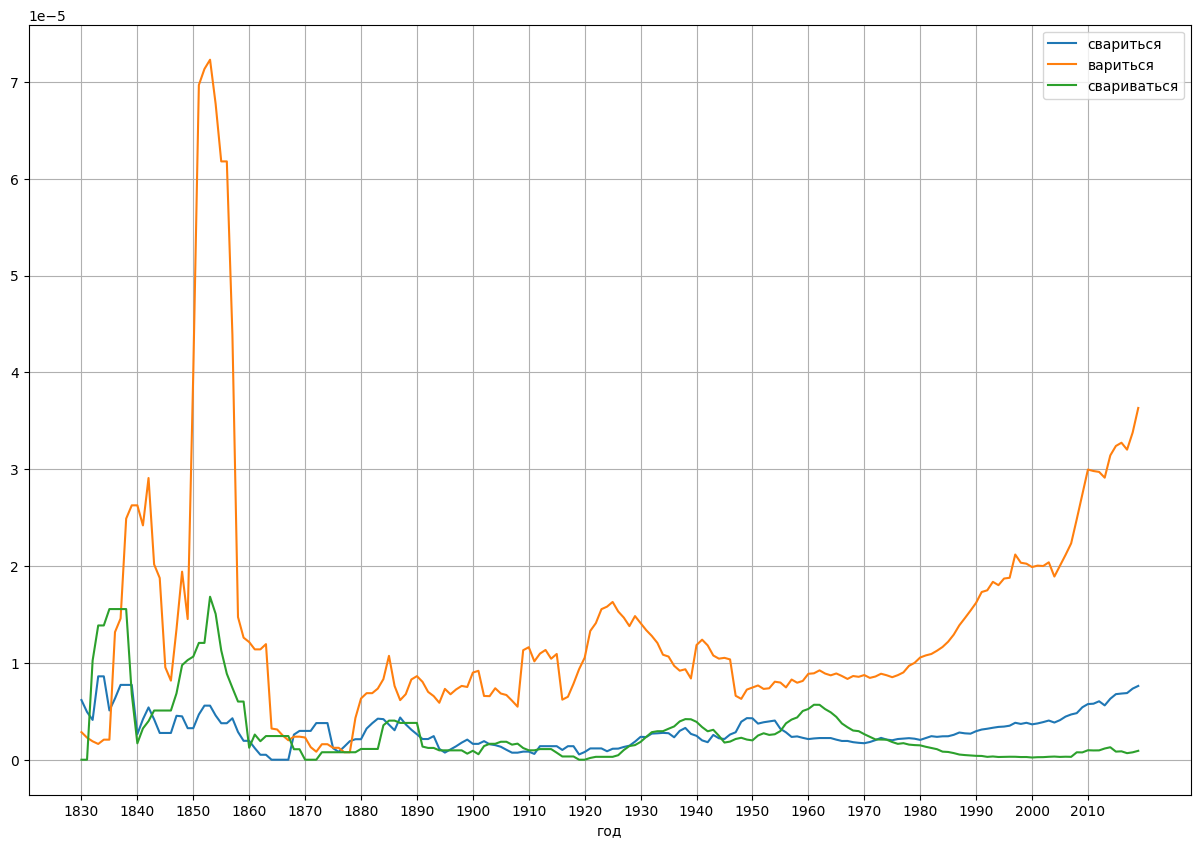

In [35]:
correlation(df, 'свариться', 'вариться', 'свариваться')

### *сварить — варить / сваривать*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,сварить/варить,0.893131,0.949634
1,сварить/сваривать,0.584721,0.139990
2,варить/сваривать,0.442377,0.105916


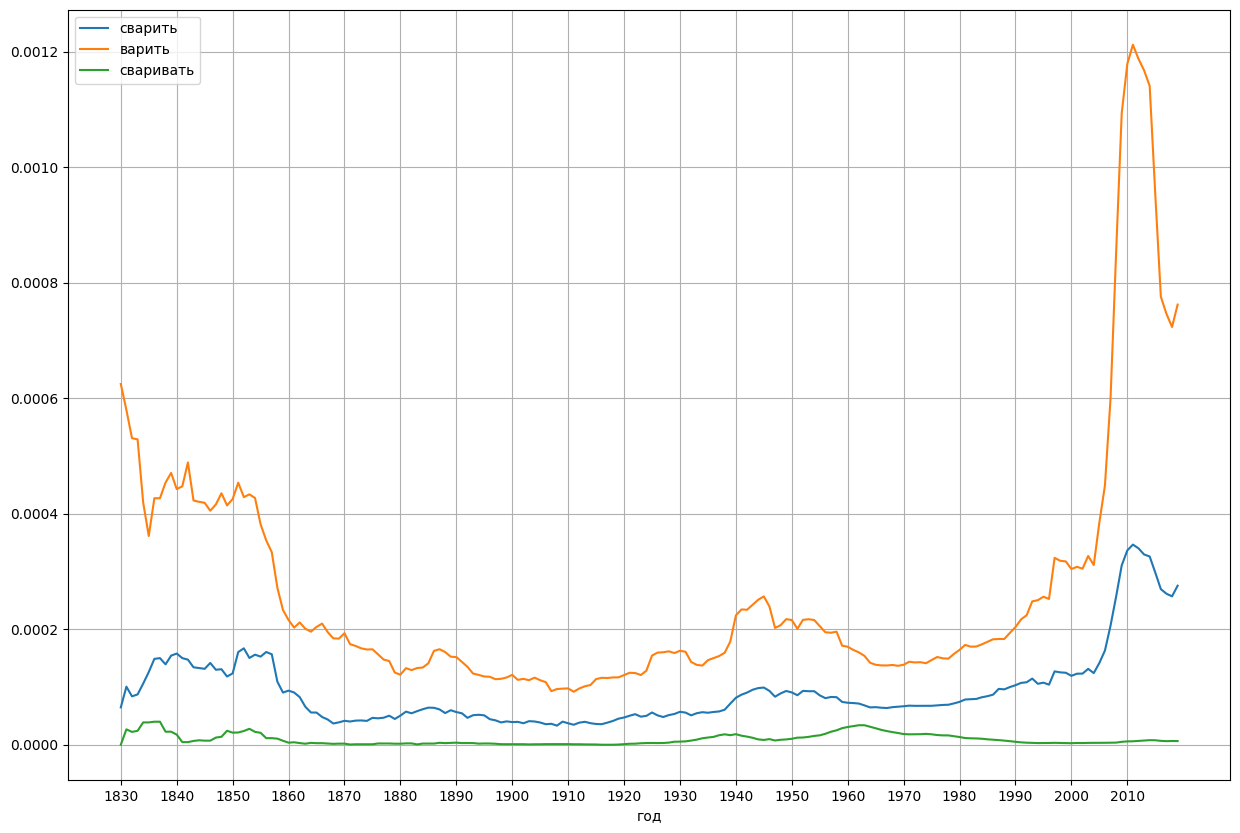

In [36]:
correlation(df, 'сварить', 'варить', 'сваривать')

### *съел — ел / съедал*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,съел/ел,0.872549,0.801306
1,съел/съедал,0.882393,0.867175
2,ел/съедал,0.767543,0.742643


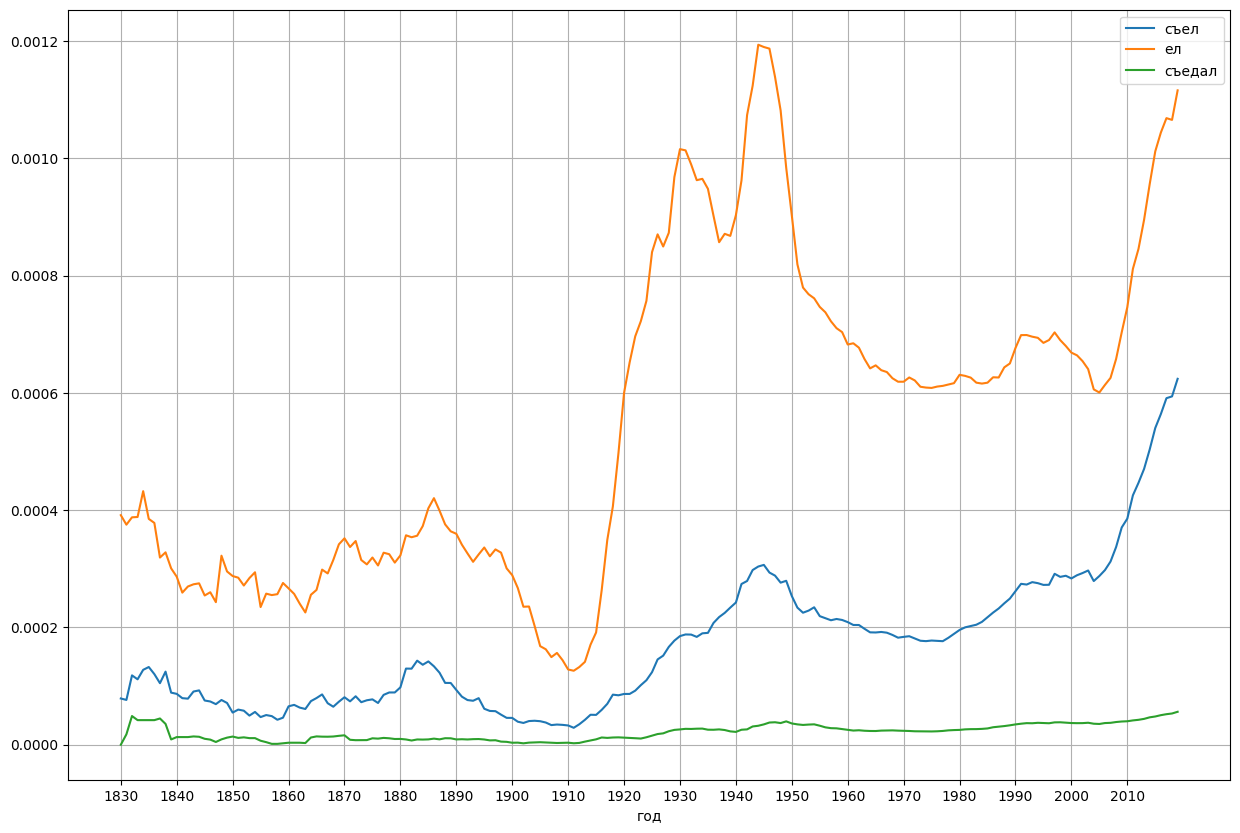

In [37]:
correlation(df, 'съел', 'ел', 'съедал')

### *оторвать — рвать / отрывать*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,оторвать/рвать,0.817185,0.877725
1,оторвать/отрывать,0.712904,0.665570
2,рвать/отрывать,0.409580,0.358407


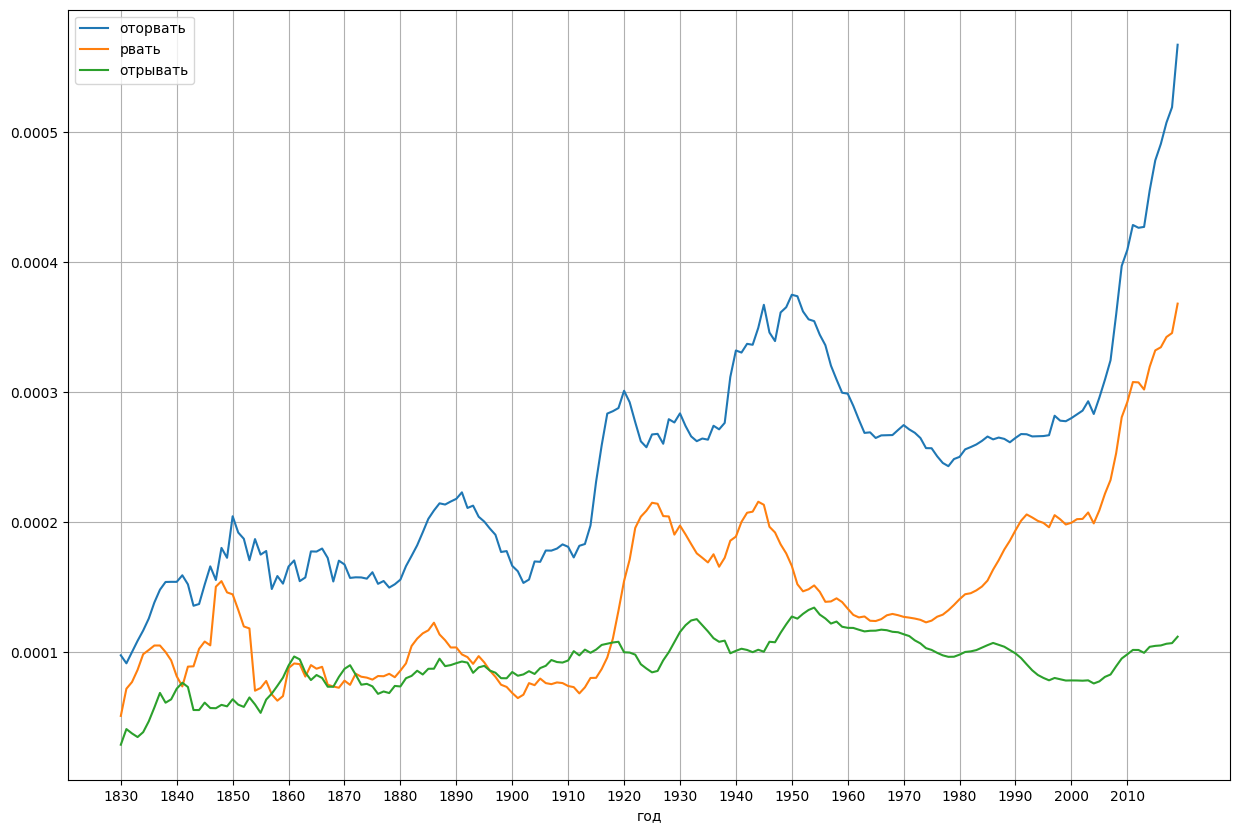

In [38]:
correlation(df, 'оторвать', 'рвать', 'отрывать')

### *пробить — бить / пробивать*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,пробить/бить,0.262829,0.283149
1,пробить/пробивать,0.713395,0.622334
2,бить/пробивать,0.273489,0.315845


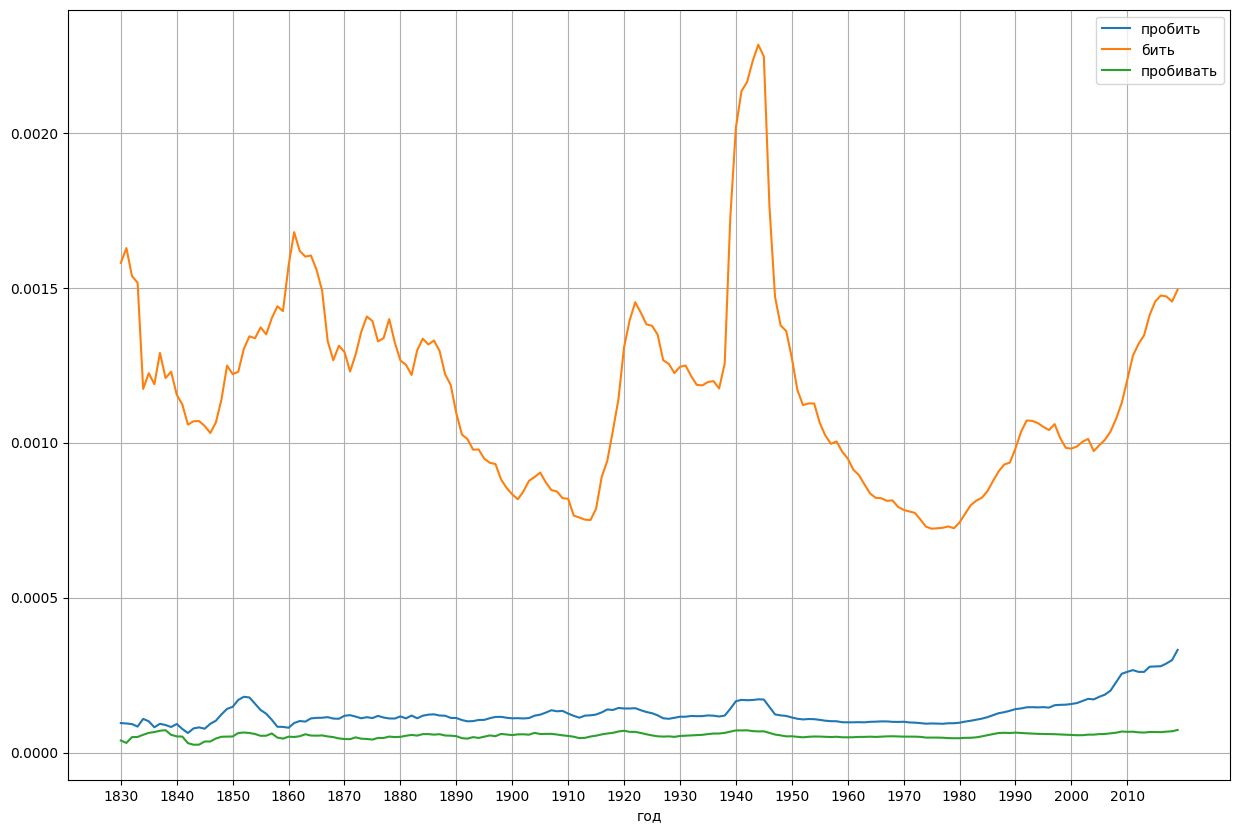

In [39]:
correlation(df, 'пробить', 'бить', 'пробивать')

### *сгореть — гореть / сгорать*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,сгореть/гореть,0.888383,0.951471
1,сгореть/сгорать,0.666408,0.719277
2,гореть/сгорать,0.741833,0.738404


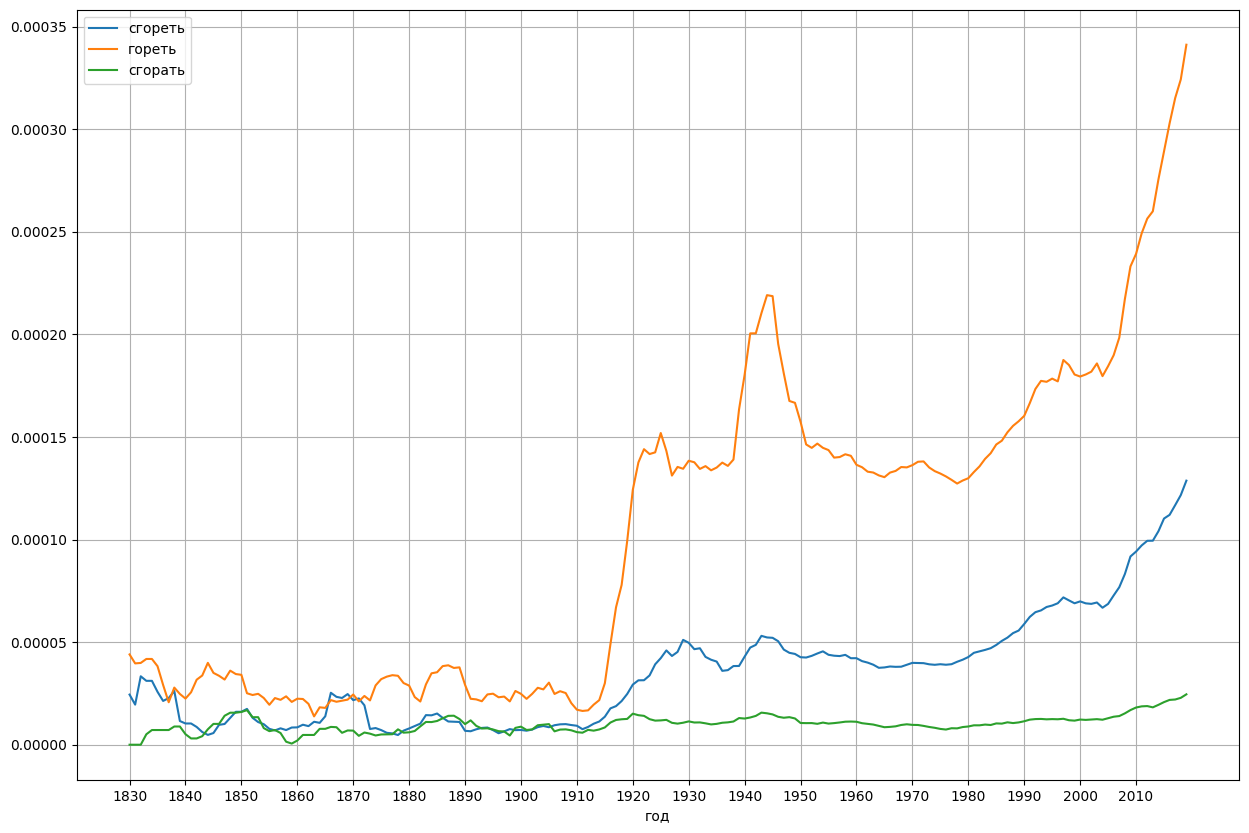

In [40]:
correlation(df, 'сгореть', 'гореть', 'сгорать')

### *сорвать — рвать / срывать*


,пара,коэффициент Спирмена,коэффициент Пирсона
0,сорвать/рвать,0.688233,0.565210
1,сорвать/срывать,0.833239,0.845277
2,рвать/срывать,0.838964,0.788175


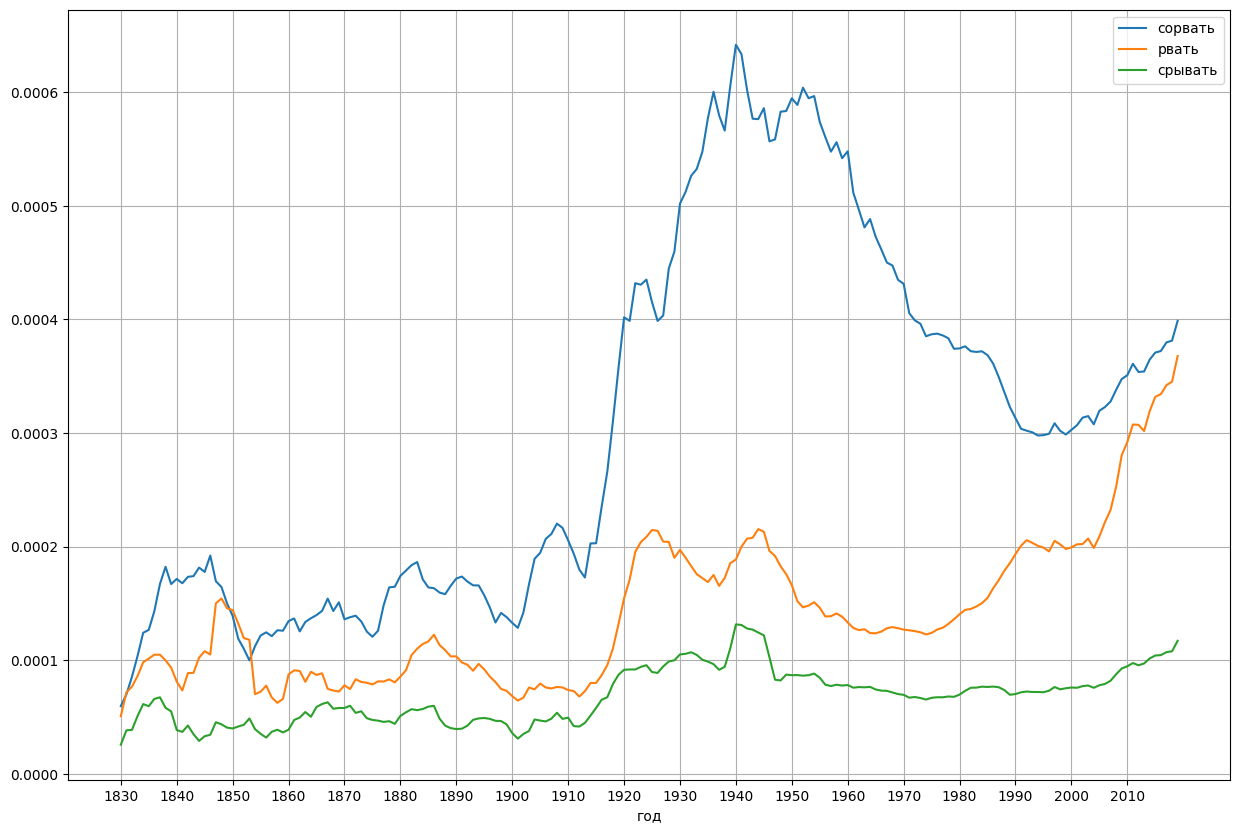

In [41]:
correlation(df, 'сорвать', 'рвать', 'срывать')

### *разбить — бить / разбивать* 

,пара,коэффициент Спирмена,коэффициент Пирсона
0,разбить/бить,0.132111,0.413336
1,разбить/разбивать,0.419929,0.390606
2,бить/разбивать,0.418079,0.393376


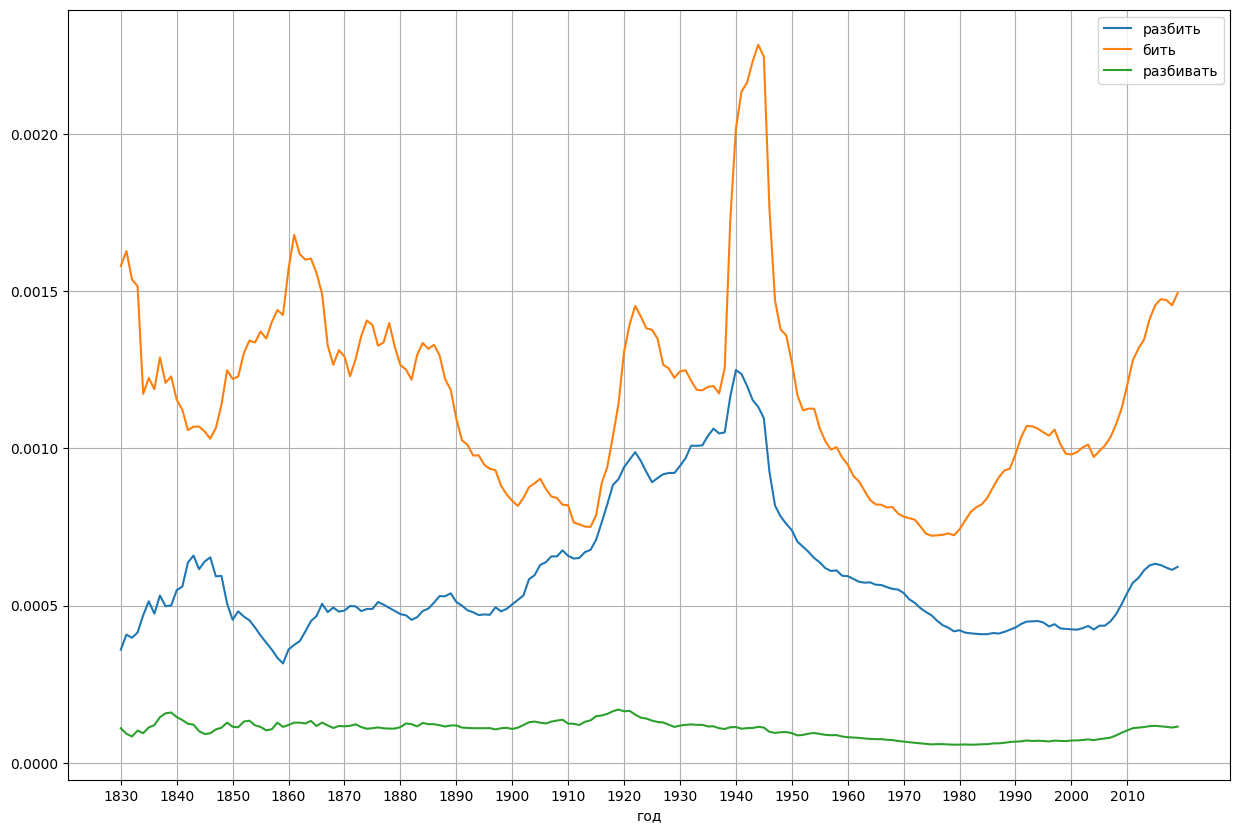

In [42]:
correlation(df, 'разбить', 'бить', 'разбивать')

### *разорвать — рвать / разрывать* 

,пара,коэффициент Спирмена,коэффициент Пирсона
0,разорвать/рвать,-0.284312,-0.133756
1,разорвать/разрывать,0.879841,0.853783
2,рвать/разрывать,-0.530642,-0.454860


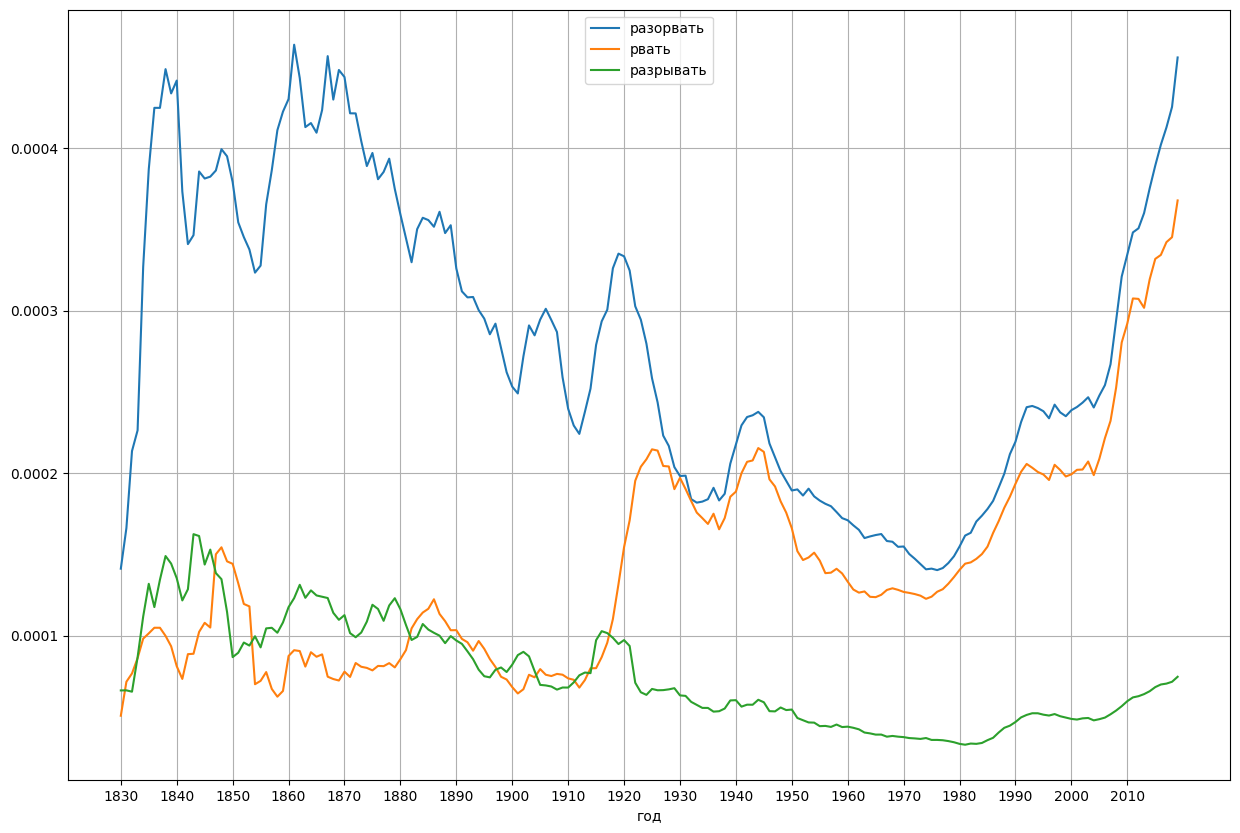

In [43]:
correlation(df, 'разорвать', 'рвать', 'разрывать')

### *намазать — мазать / намазывать* 

,пара,коэффициент Спирмена,коэффициент Пирсона
0,намазать/мазать,0.728184,0.656373
1,намазать/намазывать,0.799712,0.590232
2,мазать/намазывать,0.728868,0.666626


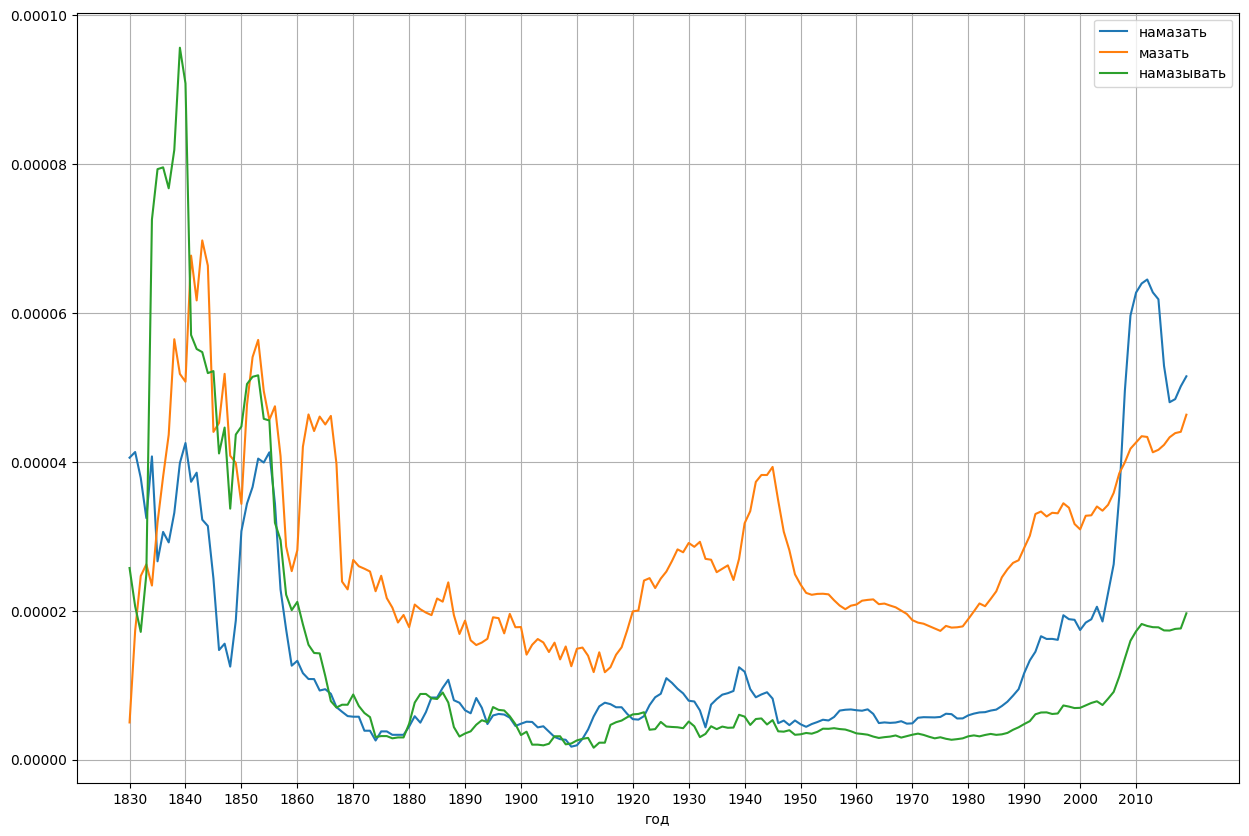

In [44]:
correlation(df, 'намазать', 'мазать', 'намазывать')

### *налить — лить / наливать*

,пара,коэффициент Спирмена,коэффициент Пирсона
0,налить/лить,0.150762,0.355373
1,налить/наливать,0.881620,0.889722
2,лить/наливать,0.310830,0.484997


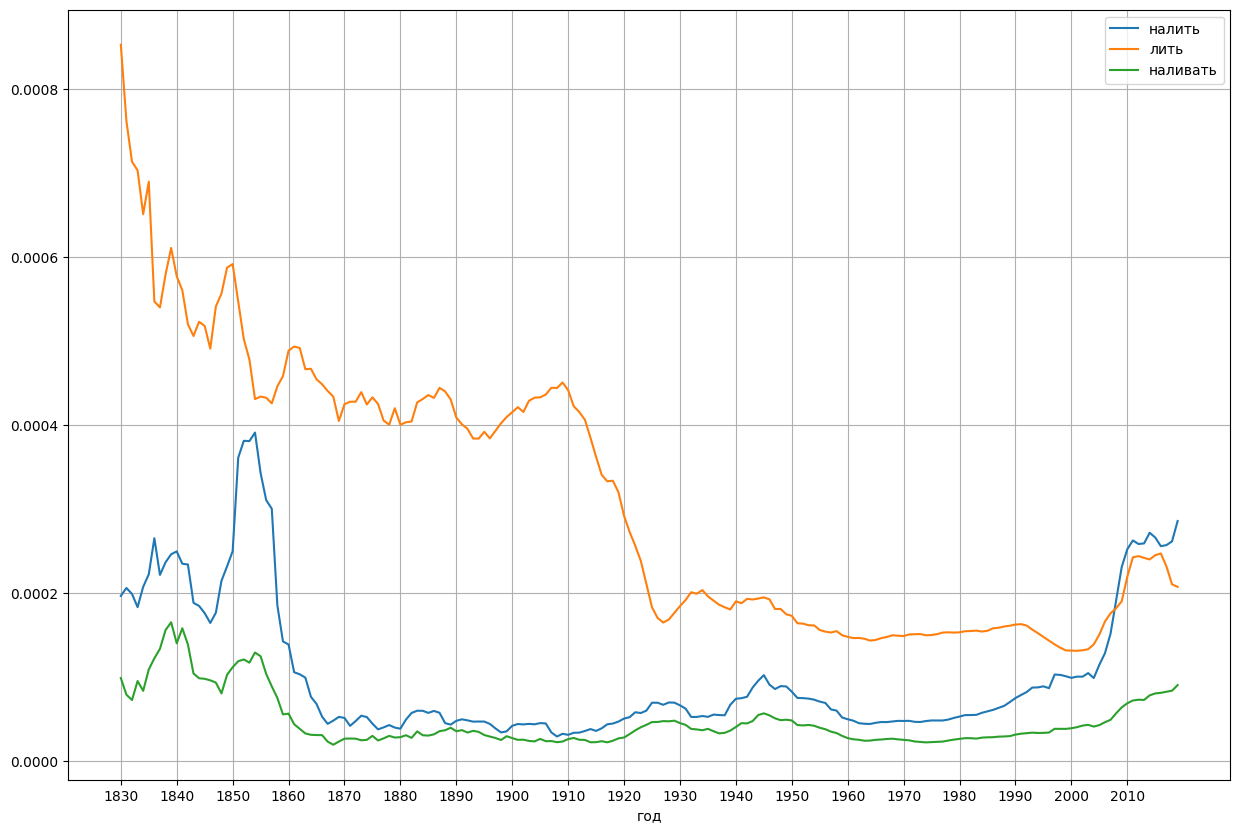

In [45]:
correlation(df, 'налить', 'лить', 'наливать')

### Обобщение результатов

Построим сводную таблицу, показывающую попарный коэффициент корреляции Спирмена в тройках.

In [46]:
correlation_df = pd.DataFrame(
    {
        'тройка': triplet_list, 
        'СВ/НСВ1': pfv_vs_ipfv1_list, 
        'СВ/НСВ2': pfv_vs_ipfv2_list,
        'НСВ1/НСВ2': ipfv1_vs_ipfv2_list
    }
)

In [47]:
correlation_df

,тройка,СВ/НСВ1,СВ/НСВ2,НСВ1/НСВ2
0,свариться – вариться/свариваться,0.377669,0.162785,-0.035436
1,сварить – варить/сваривать,0.893131,0.584721,0.442377
2,съел – ел/съедал,0.872549,0.882393,0.767543
3,оторвать – рвать/отрывать,0.817185,0.712904,0.409580
4,пробить – бить/пробивать,0.262829,0.713395,0.273489
5,сгореть – гореть/сгорать,0.888383,0.666408,0.741833
6,сорвать – рвать/срывать,0.688233,0.833239,0.838964
7,разбить – бить/разбивать,0.132111,0.419929,0.418079
8,разорвать – рвать/разрывать,-0.284312,0.879841,-0.530642
9,намазать – мазать/намазывать,0.728184,0.799712,0.728868


Отсортируем значения по убыванию в столбце `'СВ/НСВ1'`

In [48]:
correlation_df.sort_values(by='СВ/НСВ1', axis=0, ascending=False)

,тройка,СВ/НСВ1,СВ/НСВ2,НСВ1/НСВ2
1,сварить – варить/сваривать,0.893131,0.584721,0.442377
5,сгореть – гореть/сгорать,0.888383,0.666408,0.741833
2,съел – ел/съедал,0.872549,0.882393,0.767543
3,оторвать – рвать/отрывать,0.817185,0.712904,0.409580
9,намазать – мазать/намазывать,0.728184,0.799712,0.728868
6,сорвать – рвать/срывать,0.688233,0.833239,0.838964
0,свариться – вариться/свариваться,0.377669,0.162785,-0.035436
4,пробить – бить/пробивать,0.262829,0.713395,0.273489
10,налить – лить/наливать,0.150762,0.881620,0.310830
7,разбить – бить/разбивать,0.132111,0.419929,0.418079


Отсортируем значения по убыванию в столбце `'СВ/НСВ2'`

In [50]:
correlation_df.sort_values(by='СВ/НСВ2', axis=0, ascending=False)

,тройка,СВ/НСВ1,СВ/НСВ2,НСВ1/НСВ2
2,съел – ел/съедал,0.872549,0.882393,0.767543
10,налить – лить/наливать,0.150762,0.881620,0.310830
8,разорвать – рвать/разрывать,-0.284312,0.879841,-0.530642
6,сорвать – рвать/срывать,0.688233,0.833239,0.838964
9,намазать – мазать/намазывать,0.728184,0.799712,0.728868
4,пробить – бить/пробивать,0.262829,0.713395,0.273489
3,оторвать – рвать/отрывать,0.817185,0.712904,0.409580
5,сгореть – гореть/сгорать,0.888383,0.666408,0.741833
1,сварить – варить/сваривать,0.893131,0.584721,0.442377
7,разбить – бить/разбивать,0.132111,0.419929,0.418079
